# <span style="color:red">Agriculture Crop Production</span>

dataset [here](https://data.gov.in/resources/district-wise-season-wise-crop-production-statistics-1997) and also from [here](https://www.kaggle.com/abhiseklewan/crop-production-statistics-from-1997-in-india)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/home/purna/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
#using style
plt.style.use('fivethirtyeight')

In [3]:
#setting image size
plt.rcParams['figure.figsize'] = 12,6

In [4]:
#data loading
data = pd.read_csv("apy.csv")

In [5]:
#top5 rows 
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
#shape of data
data.shape

(246091, 7)

In [7]:
#columns
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [8]:
#gives more info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       246091 non-null object
District_Name    246091 non-null object
Crop_Year        246091 non-null int64
Season           246091 non-null object
Crop             246091 non-null object
Area             246091 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
#stats information
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


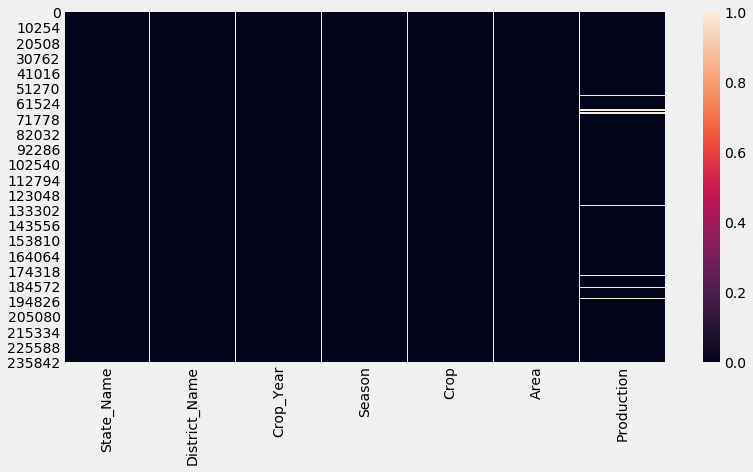

In [10]:
#Heatmap of null values
sns.heatmap(data.isna())

we have null values, and lets drop them.

In [11]:
#drop null values
data.dropna(inplace = True)

In [12]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [13]:
#Drop duplicates
data.duplicated().sum()

0

no duplicates

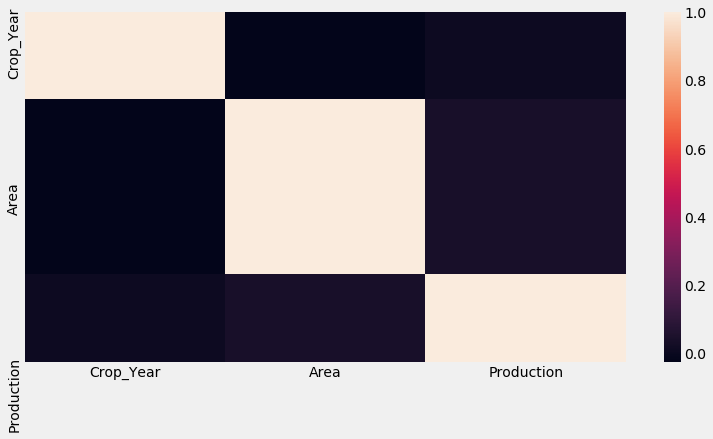

In [14]:
#heatmap of Dataset
data.corr()
sns.heatmap(data.corr())

## statename

In [15]:
#unique states counts
data.State_Name.nunique()

33

In [16]:
#uniques states
data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [17]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0, 0.5, 'Count')

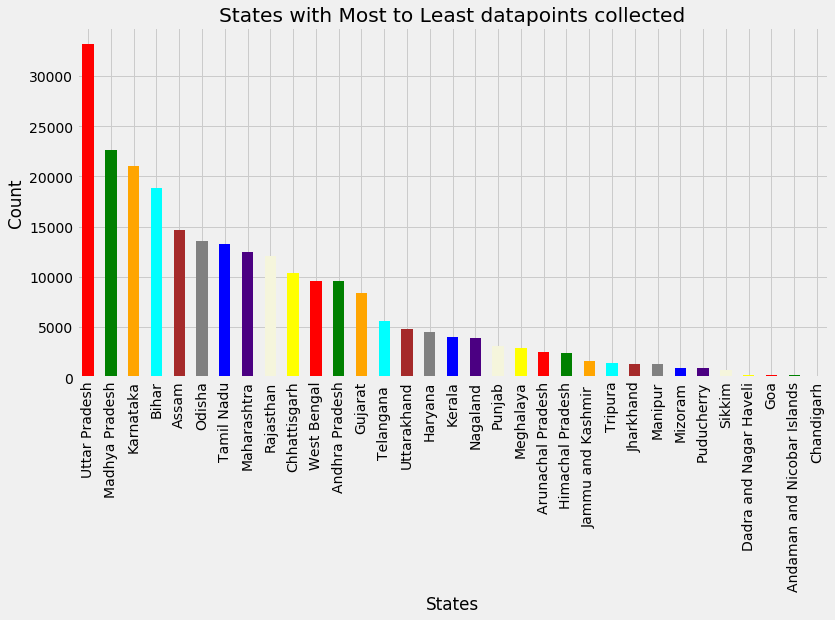

In [18]:
data.State_Name.value_counts().plot(kind= 'bar',colors = colors)
plt.title("States with Most to Least datapoints collected")
plt.xlabel("States")
plt.ylabel("Count")

In [19]:
Statopro = data.groupby('State_Name')['Production'].sum()

In [20]:
import plotly
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py
#import cufflinks as cf
# Configuring Plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
#cf.go_offline(connected=True)

In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=Statopro.index,
    y=Statopro.values,
    name='State_Name',
    marker_color='crimson'
))

fig.show()

#### Note:-
- from the graph you can seee that we have most of the Crop production happening from **kerala,Andhra pradesh, Tamil nadu**



### what is the crop in Every state giving highest production?

In [22]:
stacrop = data.groupby(['State_Name','Crop'])['Production'].sum().sort_values(ascending = False)

In [23]:
stacrop = stacrop.reset_index()

In [24]:
stacrop = stacrop.drop_duplicates(subset='State_Name', keep = 'first')

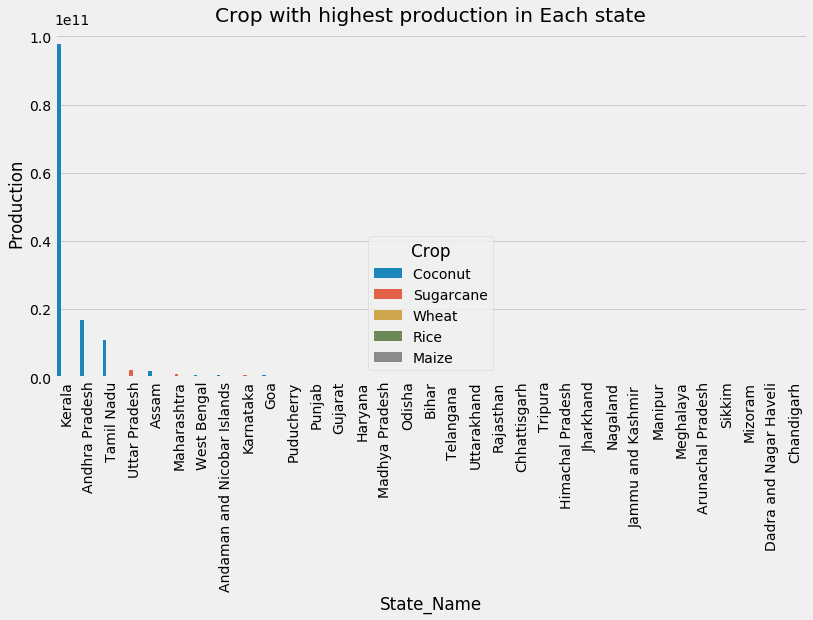

In [25]:
sns.barplot(x  = 'State_Name',y = 'Production', data = stacrop,hue = 'Crop' )
plt.xticks(rotation =90)
plt.title("Crop with highest production in Each state")
plt.show()

In [26]:
edit1 = stacrop[stacrop['State_Name'] != 'Kerala']
edit2 = edit1[edit1['State_Name'] != 'Andhra Pradesh']
next_stacrop = edit2[edit1['State_Name'] != 'Tamil Nadu']

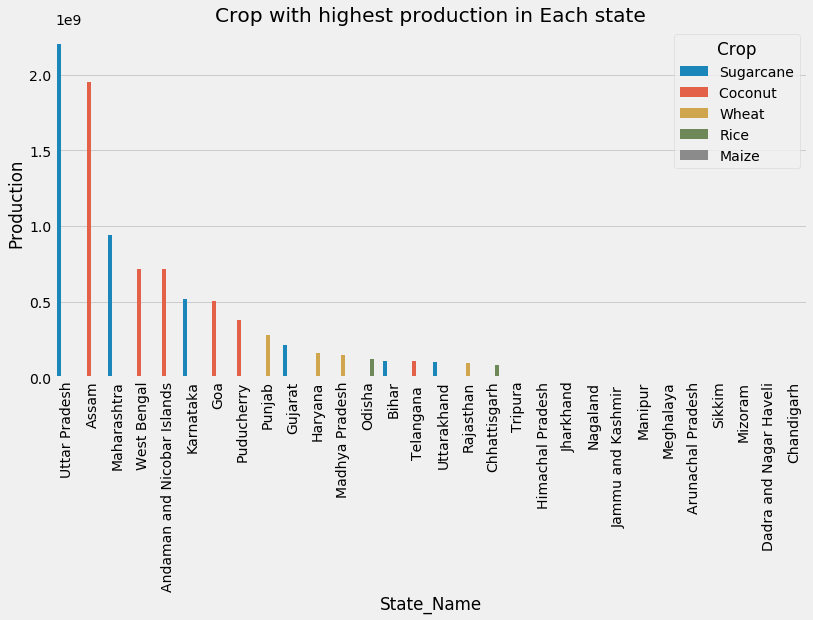

In [27]:
sns.barplot(x  = 'State_Name',y = 'Production', data = next_stacrop,hue = 'Crop' )
plt.xticks(rotation =90)
plt.title("Crop with highest production in Each state")
plt.show()

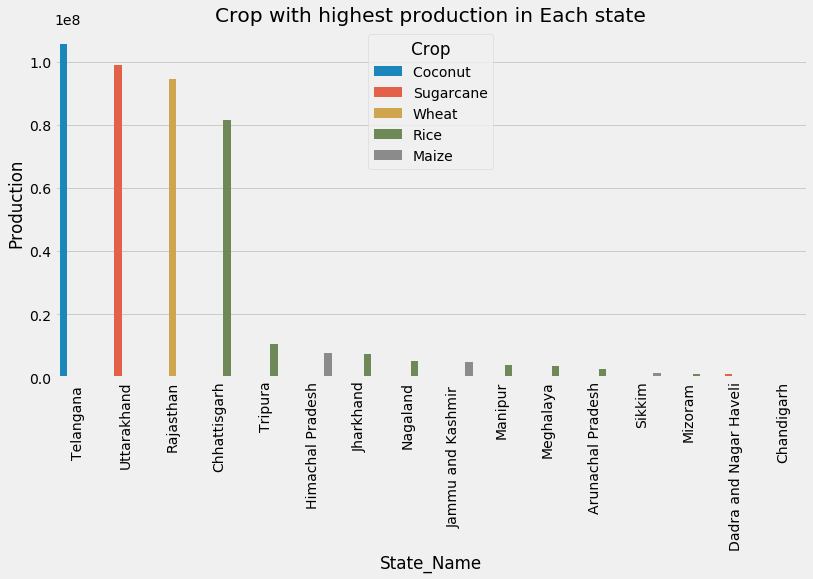

In [28]:
sns.barplot(x  = 'State_Name',y = 'Production', data = next_stacrop.tail(16),hue = 'Crop' )
plt.xticks(rotation =90)
plt.title("Crop with highest production in Each state")
plt.show()

## District Name

In [29]:
data.District_Name.nunique()

646

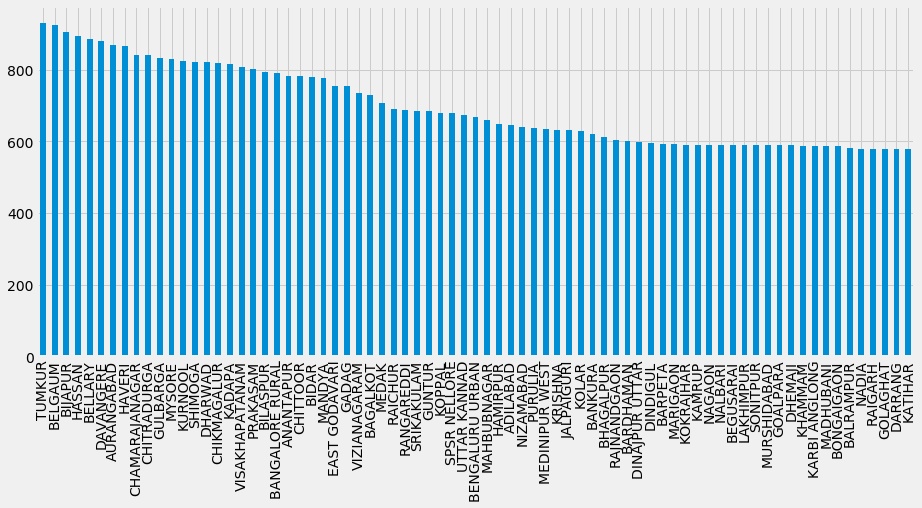

In [30]:
plt.figure(figsize = (14,6))
data.District_Name.value_counts()[:75].plot(kind = 'bar')

### what are top highest production giving districts?

In [31]:
distprod = data.groupby('District_Name')['Production'].sum() 

Text(0.5, 1.0, 'Top10 highest crop production Districts')

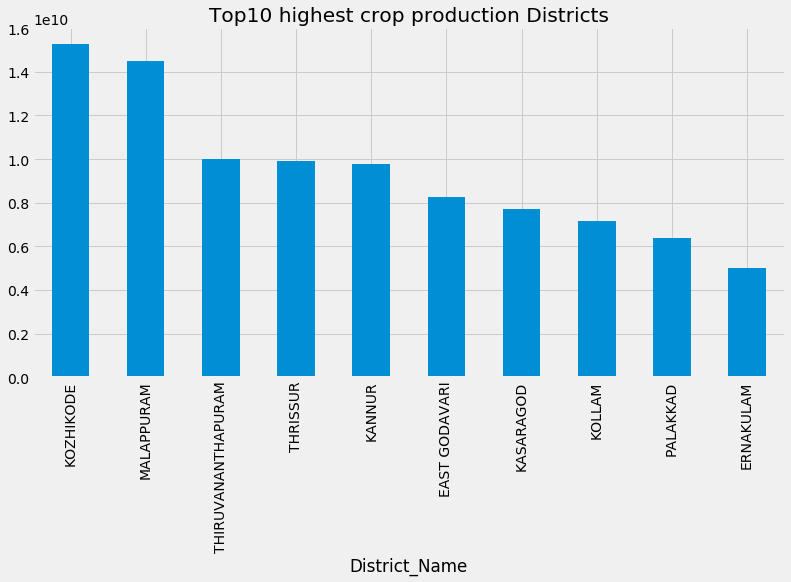

In [32]:
distprod.sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title("Top10 highest crop production Districts")

Text(0.5, 1.0, '10 Least crop production Districts')

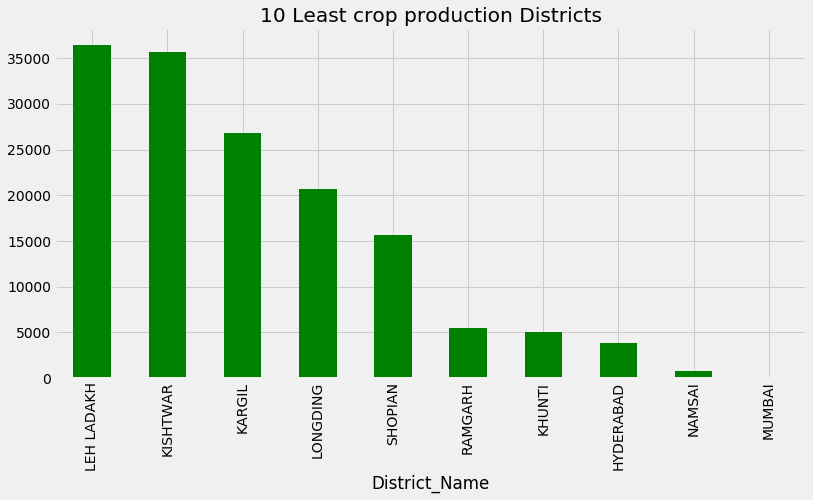

In [33]:
distprod.sort_values(ascending = False).tail(10).plot(kind = 'bar',color = 'g')
plt.title("10 Least crop production Districts")

## Crop_year

In [34]:
data.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [35]:
data.Crop_Year.min()

1997

In [36]:
data.Crop_Year.max()

2015

We have Crop years ranging from **1997 to 2015**.

### what is the year wise production?

In [37]:
yeapro = data.groupby('Crop_Year')['Production'].sum()

Text(0, 0.5, 'Production')

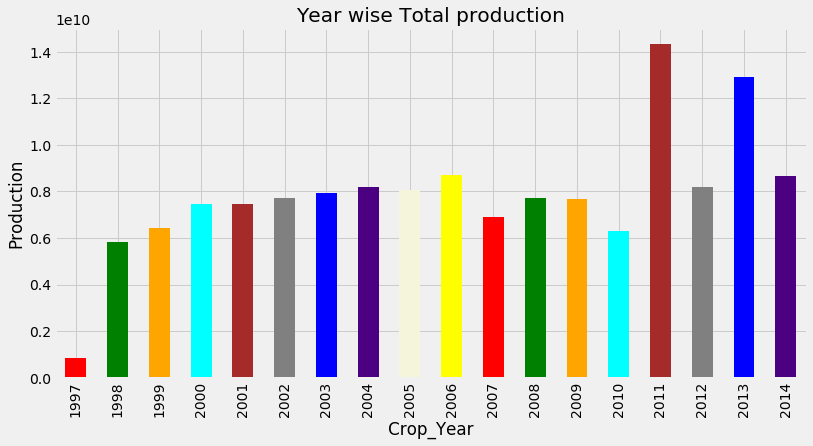

In [38]:
yeapro.head(18).plot(kind  = 'bar',colors= colors)
plt.title("Year wise Total production")
plt.ylabel("Production")

- <span style="color:red">**2011** </span> had highest production.
- <span style="color:red">**1997** </span> had least production.

### what is the crop with highest production in each year?

In [39]:
a = pd.DataFrame(data.groupby(['Crop_Year','Crop'])['Production'].sum().sort_values(ascending = False).reset_index().drop_duplicates(subset = 'Crop_Year',keep = 'first'))

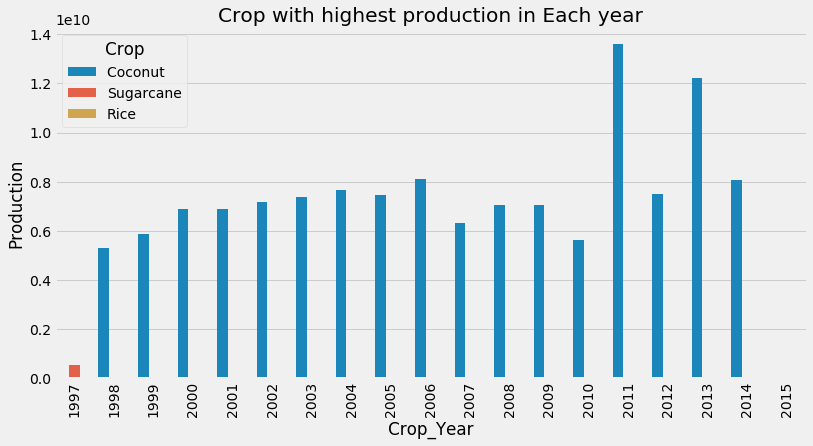

In [40]:
sns.barplot(x  = 'Crop_Year',y = 'Production', data = a,hue = 'Crop' )
plt.xticks(rotation =90)
plt.title("Crop with highest production in Each year")
plt.show()

## Season

In [41]:
data.Season.nunique()

6

In [42]:
data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [43]:
data.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

we have most of the Crop prodcution happening in <span style="color:red">**kharif**</span> season which means at the end of monsoon or at the beginning of winter season.

In season we have *whole year* as season. lets remove it.

In [44]:
No_wholeyear = data[data['Season']!="Whole Year "]

### overall in which season we have most production?

Text(0.5, 1.0, 'Season wise production')

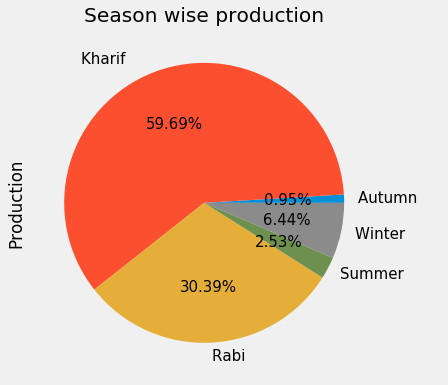

In [45]:
No_wholeyear.groupby('Season')['Production'].sum().plot(kind = 'pie',autopct='%.2f%%',fontsize = 15)
plt.title("Season wise production")

Text(0.5, 1.0, 'Season wise production with whole year as season')

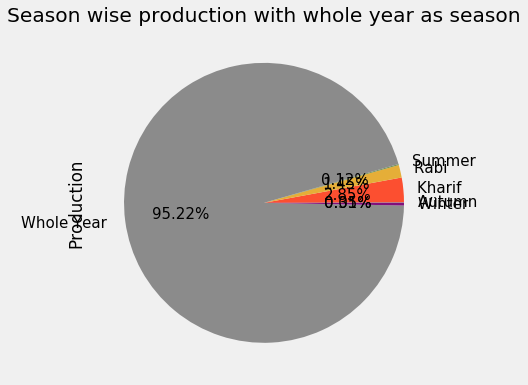

In [46]:
data.groupby('Season')['Production'].sum().plot(kind = 'pie',autopct='%.2f%%',fontsize = 15)
plt.title("Season wise production with whole year as season")

### What is the crop with highest prodcution in Each season?

In [47]:
whocropro = data.groupby(['Season','Crop'])['Production'].sum().sort_values(ascending = False)

In [48]:
whocropro = whocropro.reset_index()

In [49]:
whocropro = whocropro.drop_duplicates(subset = 'Season',keep = 'first')

Text(0.5, 1.0, 'Crop with Highest production in each season')

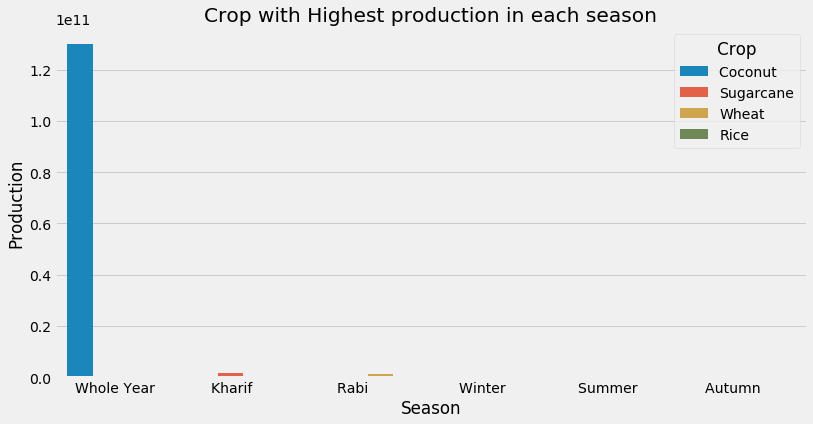

In [50]:
sns.barplot(x="Season", y="Production",data= whocropro,hue = 'Crop')
plt.title("Crop with Highest production in each season")

In [51]:
cropro = No_wholeyear.groupby(['Season','Crop'])['Production'].sum().sort_values(ascending = False)

In [52]:
cropro = cropro.reset_index()

In [53]:
cropro = cropro.drop_duplicates(subset = 'Season',keep = 'first')

Text(0.5, 1.0, 'Crop with Highest production in each season')

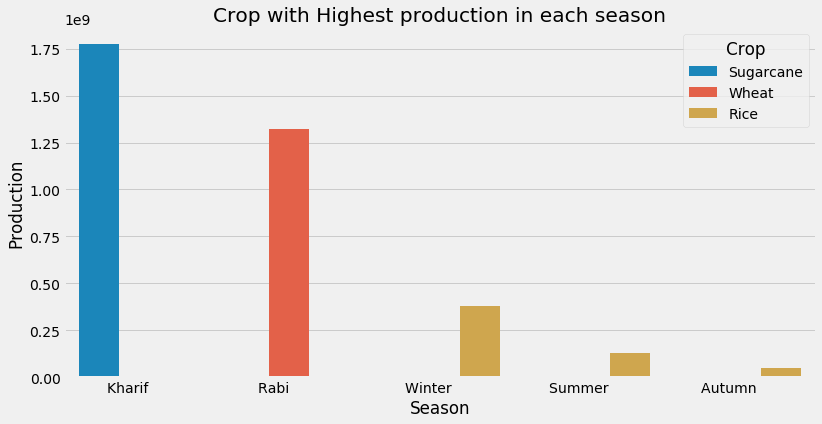

In [54]:
sns.barplot(x="Season", y="Production",data= cropro,hue = 'Crop')
plt.title("Crop with Highest production in each season")

### In which season we have more production in every year?


#### with whole year as Season type¶

Text(0.5, 1.0, 'season wise crop production for Every year')

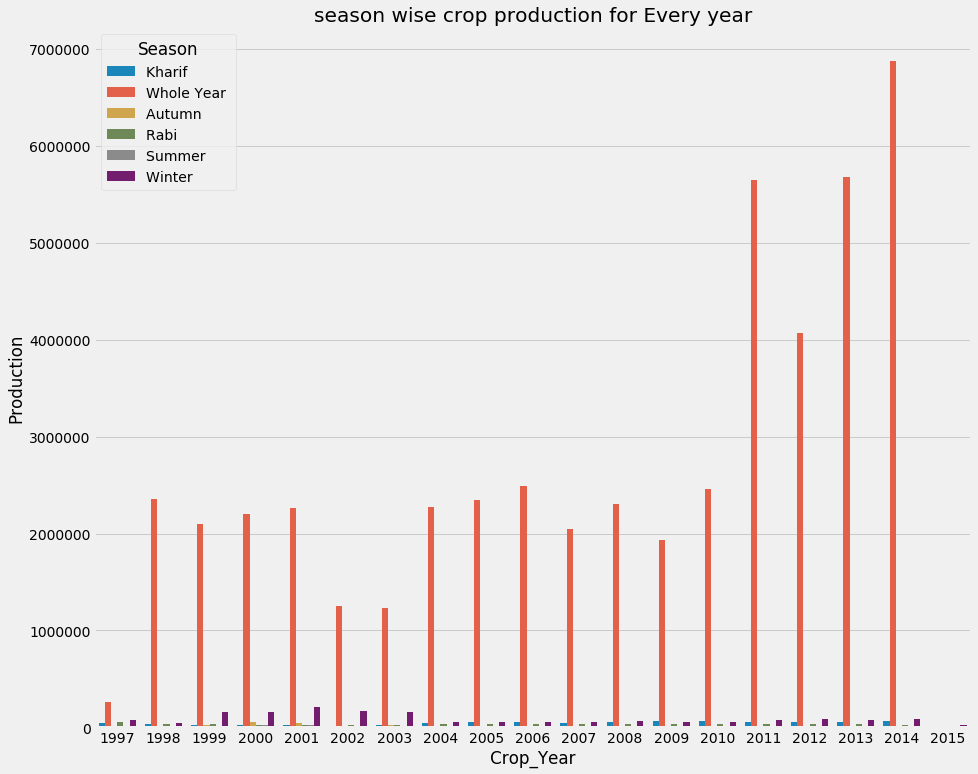

In [55]:
plt.figure(figsize = (14,12))
sns.barplot(x = 'Crop_Year',y = 'Production',data = data,hue = "Season",ci = None)
plt.title("season wise crop production for Every year")

#### without Whole year as Season type

Text(0.5, 1.0, 'season wise crop production for Every year')

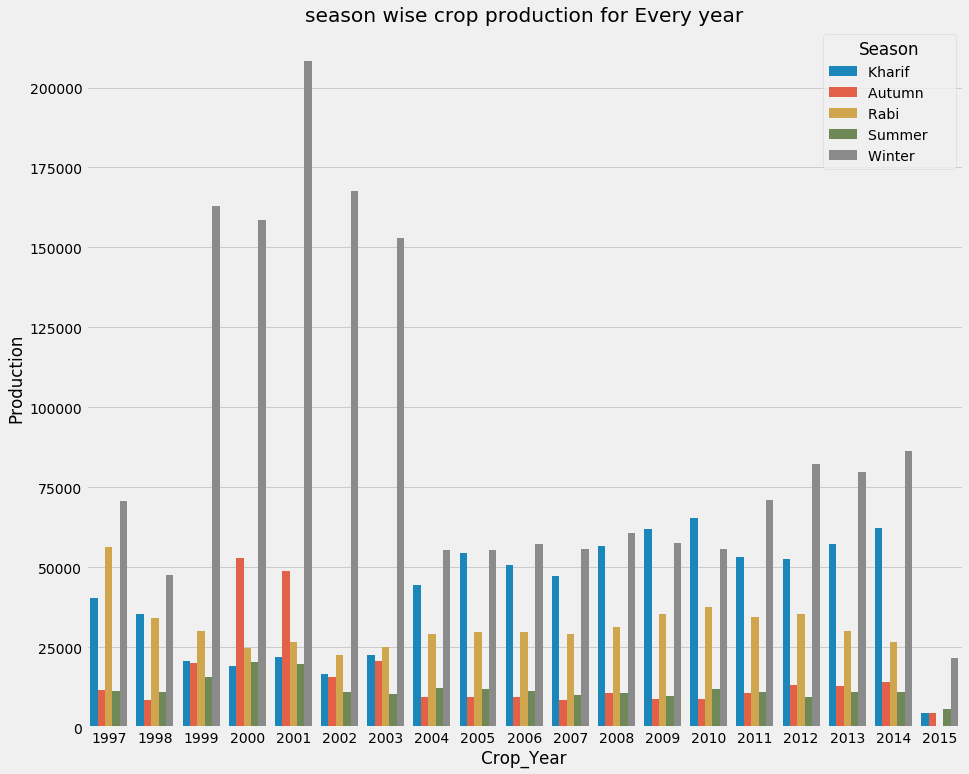

In [56]:
plt.figure(figsize = (14,12))
sns.barplot(x = 'Crop_Year',y = 'Production',data = No_wholeyear,hue = "Season",ci = None)
plt.title("season wise crop production for Every year")

## Crop

In [57]:
data.Crop.nunique()

124

In [58]:
data.Crop.value_counts().head()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [59]:
import wordcloud

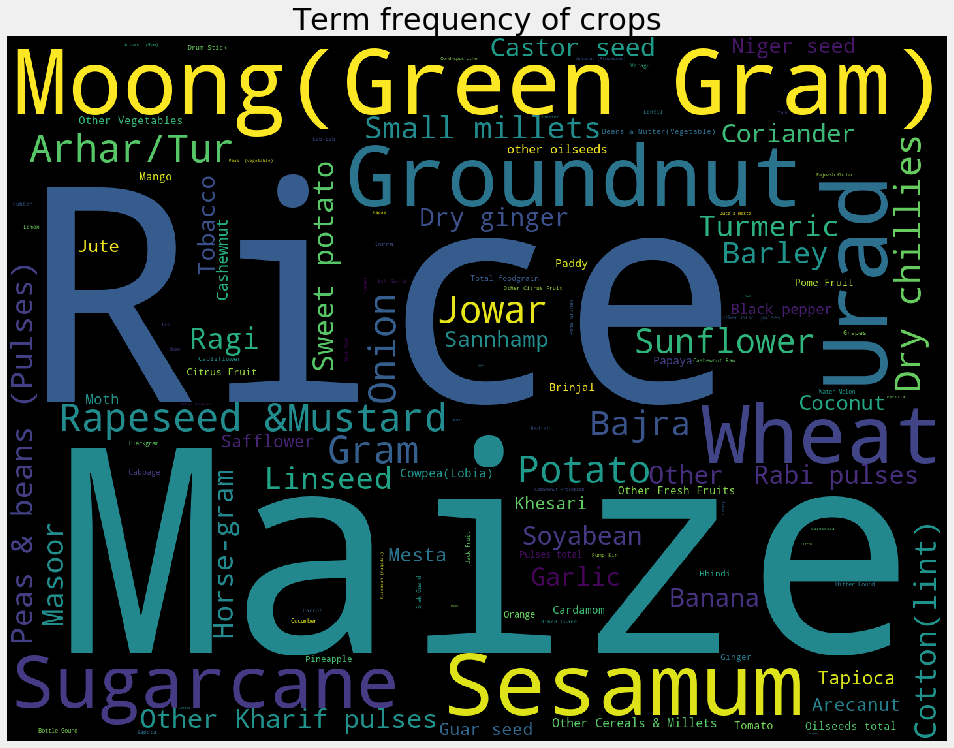

In [60]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(data.Crop.value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.title("Term frequency of crops",fontsize = 30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can see that most Producing Crop is <span style="color:red">**Rice, Maize,Moong,Urad,Sesamum**</span>.

In [61]:
data[data['Area'] == data.Area.max()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
244878,West Bengal,NADIA,1997,Rabi,Oilseeds total,8580100.0,7556300.0


- 1Quinta = 100kg
- 1ton = 1000kg

In [62]:
data[data['Production'] == data.Production.max()]


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09


Highest production happend in the year 2011 in Coimbatore district in Tamil nadu.

In [63]:
Croptoprod = data.groupby('Crop_Year')['Area','Production'].sum()

In [64]:
import plotly.graph_objs as go

'''months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']'''

#fig = plt.axes()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=Croptoprod.index,
    y=Croptoprod['Area'].values,
    name='Area',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=Croptoprod.index,
    y=Croptoprod['Production'].values,
    name='Production',
    marker_color='indianred'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
#fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

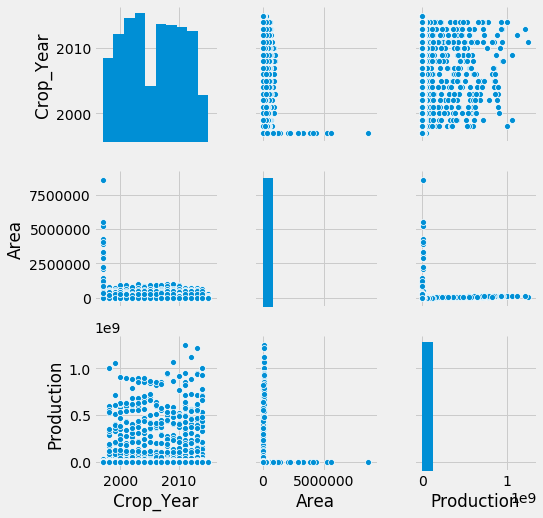

In [65]:
#pairplot
sns.pairplot(data,palette = 'Viridis')

## Model building 1

In [66]:
data1 = data[['Crop_Year','Production']]

In [67]:
data1.head()

,Crop_Year,Production
0,2000,2000.0
1,2000,1.0
2,2000,321.0
3,2000,641.0
4,2000,165.0


In [68]:
data1 = data1.groupby('Crop_Year')['Production'].sum()

In [69]:
#data1 = data1.reset_index()

In [70]:
data1

Crop_Year
1997    8.512329e+08
1998    5.825321e+09
1999    6.434666e+09
2000    7.449709e+09
2001    7.465541e+09
2002    7.696955e+09
2003    7.917974e+09
2004    8.189462e+09
2005    8.043757e+09
2006    8.681913e+09
2007    6.879442e+09
2008    7.717018e+09
2009    7.660494e+09
2010    6.307609e+09
2011    1.430890e+10
2012    8.171055e+09
2013    1.290359e+10
2014    8.664541e+09
2015    6.935065e+06
Name: Production, dtype: float64

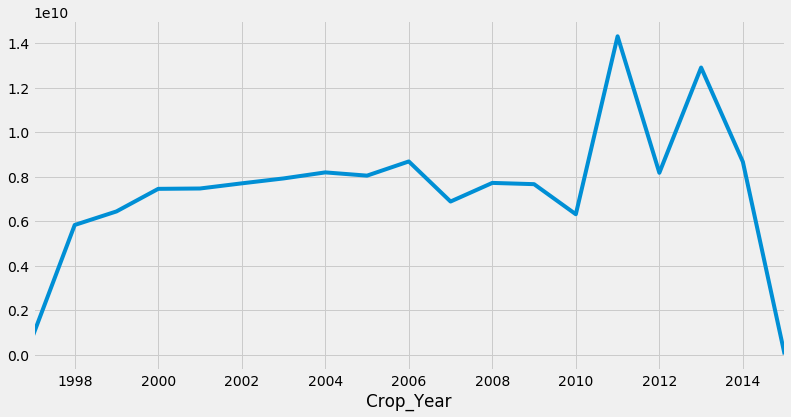

In [71]:
data1.plot(kind  = 'line')

In [72]:
import datetime as dt

# MOdel building 2

In [73]:
data2 = data[['Season','Crop','Area','Production']]

In [74]:
data2.sample(10)

,Season,Crop,Area,Production
11322,Whole Year,Oilseeds total,1204.0,992.0
136044,Kharif,Sesamum,100.0,30.0
225479,Summer,Rice,1.0,2.0
147485,Rabi,Gram,540.0,220.0
243140,Summer,Moong(Green Gram),132.0,84.0
43583,Autumn,Rice,7514.0,3796.0
239964,Summer,Moong(Green Gram),128.0,31.0
60308,Summer,Bajra,1500.0,3600.0
9114,Kharif,Rice,119079.0,306509.0
21342,Rabi,Urad,1366.0,760.0


In [75]:
data2.Season.nunique()

6

In [76]:
data2.Crop.nunique()

124

In [77]:
data2.Production.nunique()

51627

In [78]:
data2.Area.nunique()

38391

#label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data2['Season'] = lb.fit_transform(data2['Season'])

In [79]:
dummyseason  =pd.get_dummies(data2.Season)
dummycrop = pd.get_dummies(data2.Crop)

In [80]:
final = pd.concat([data2,dummyseason,dummycrop],axis = 1)

In [81]:
final = final.drop(['Crop','Season'],axis = 1)

In [82]:
final.sample(10)

,Area,Production,Autumn,Kharif,Rabi,Summer,Whole Year,Winter,Apple,Arcanut (Processed),...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
18804,299.0,4434.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58662,3000.0,1600.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
194,73.0,253.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105055,86.0,43.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7193,1221.0,11087.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104909,3.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136103,32100.0,11300.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33095,4793.0,3791.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175799,872.0,159.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
188863,1641.0,1075.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
x = final.drop(['Production'],axis=1)
y = final['Production']

In [84]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [85]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [86]:
lr.score(X_test,y_test)*100

11.62622425933012

In [87]:
#ridge regression
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [88]:
rdg.score(X_test,y_test)*100

11.627773831114874

In [89]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [90]:
rfr.score(X_test,y_test)*100

61.111968105320244

In [91]:
#Lasso regresison
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [92]:
ls.score(X_test,y_test)*100

11.62622912801027

### feature scaling

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [95]:
rfr.score(X_test,y_test)*100

59.41546415065149

## Random forest increased from 61.75 to 63.13

In [96]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [97]:
rfr.score(X_test,y_test)*100

63.836169308846856

## Now Random Forest increased from 63.13 to 64.02.

### Cross validation

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 5, random_state=60)

result = cross_val_score(rfr, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

0.488593511298002


In [99]:
print(result)

[0.08206824 0.83432057 0.61946905 0.64542566 0.26168404]


In [100]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)


[23:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [101]:
xgb.score(X_test,y_test)*100

66.8598891733327

## XGBoost gave 66.85 accuracy

In [102]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=100, booster='gbtree')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

[23:15:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
xgb.score(X_test, y_test)* 100

66.8598891733327

In [104]:
#xgb tuning 2
model = XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8, 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [105]:
model.fit(X_train,y_train)
y_pred_xgb = model.predict(X_test)

[23:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [106]:
model.score(X_test, y_test)* 100

67.20248327891045

In [107]:
#xgb tuning 3
best_xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=12,                 
                 learning_rate=0.01,
                 max_depth=4,
                 n_estimators=1200,                                                                    
                 reg_alpha=0.4,
                 subsample=0.8)

In [108]:
best_xgb_model.fit(X_train,y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

[23:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [109]:
best_xgb_model.score(X_test, y_test)* 100

67.70343836868679

## finally XGBRegressor gave 67.70 accuracy.

#### Final dataframe with Actual and predicted

In [110]:
finalop = pd.DataFrame({"actual":y_test,'predicted':y_pred_xgb})

In [111]:
finalop

,actual,predicted
146270,2980.0,4.458891e+04
144829,950.0,2.411606e+04
135661,18300.0,-8.853093e+04
232584,29.0,2.415244e+03
190625,6696.0,-1.814126e+05
102463,819.0,2.640060e+04
45044,32.0,-2.323711e+04
19114,40.0,3.210576e+04
228969,4094.0,2.437364e+04
63060,500.0,-1.497670e+04


In [112]:
a=pd.DataFrame()
a['actual']=y_test*100
a['predicted']=y_pred_xgb*100

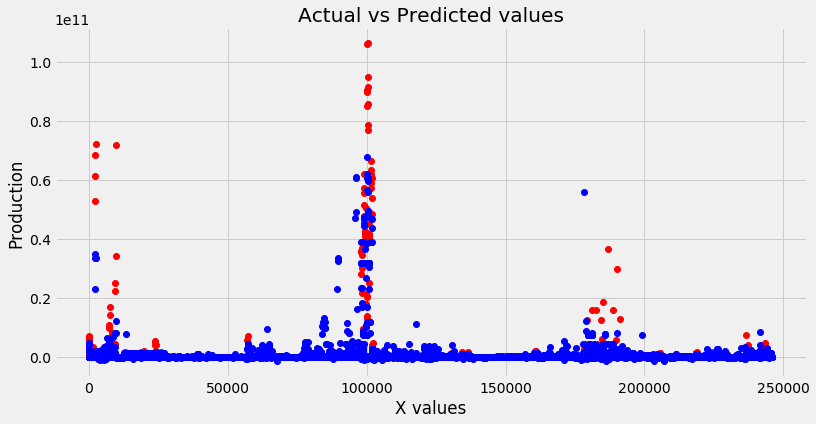

In [113]:
Randpred = pd.DataFrame({"actual": y_test,"pred": y_pred_xgb})
Randpred.head(100)
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(a['actual'],"ro") 
plt.plot(a['predicted'],"bo")   # regression line
 # scatter plot showing actual data
plt.title('Actual vs Predicted values')
plt.xlabel('X values')
plt.ylabel('Production')

plt.show()

In [114]:
b=a.reset_index()

In [115]:
del b['index']

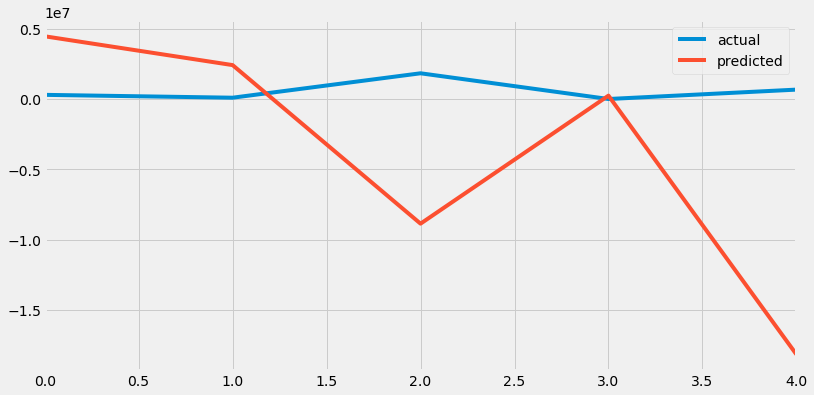

In [116]:
b.head().plot()

## MoreEDA

(0, 1000000)

<Figure size 864x432 with 0 Axes>

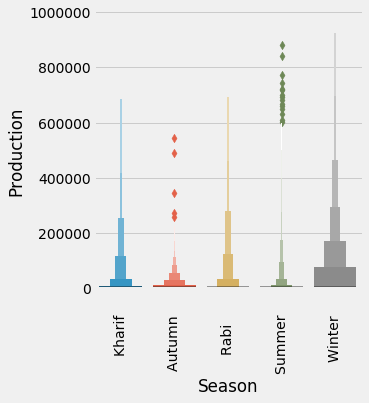

In [117]:
plt.figure(figsize = (12,6))
sns.catplot(x="Season", y="Production", kind="boxen",data= No_wholeyear)
plt.xticks(rotation = 90)
plt.ylim(0,1000000)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 864x432 with 0 Axes>

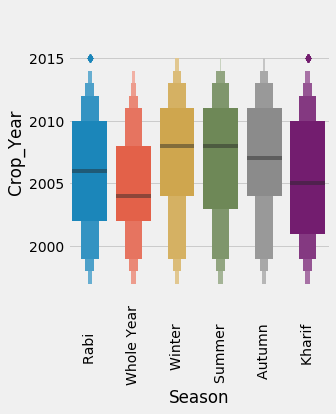

In [118]:
##better representation of box plots
plt.figure(figsize = (12,6))
sns.catplot(x="Season", y="Crop_Year", kind="boxen",data= data.sort_values('Crop_Year'))
plt.xticks(rotation = 90)

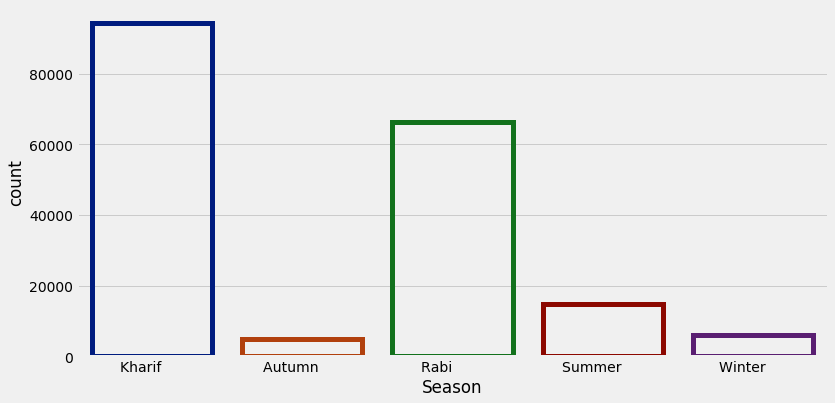

In [119]:
sns.countplot('Season',data = No_wholeyear,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 5))